In [5]:
import os
import itertools
import glob
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

sns.set(font_scale=0.9, style='whitegrid', font='CMU Sans Serif')
pal = sns.color_palette(['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB'])
sns.set_palette(pal)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['figure.figsize'] = (4.5,2)
mpl.rcParams['figure.dpi'] = 100

In [6]:
TRAJECTORY_DATA = "../pkg/model/bupt_trajectory.csv"

In [7]:
traj_df = pd.read_csv(TRAJECTORY_DATA)
traj_df.fillna(0, inplace=True)

<GeoAxes: xlabel='lon', ylabel='lat'>

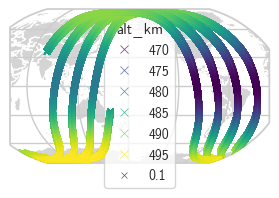

In [8]:
fig, ax = plt.subplots(
    figsize=(4.5, 2),
    subplot_kw={"projection": cartopy.crs.Robinson(central_longitude=180)},
)

ax.add_feature(
    cartopy.feature.BORDERS, linestyle="-", alpha=1, edgecolor=("#FFFFFF")
)

ax.add_feature(cartopy.feature.LAND, facecolor=("#d4d4d4"))
ax.gridlines()

# df = pd.DataFrame(samples, columns=["c", "lat", "lng", "alt"])

cmap = sns.color_palette("viridis", as_cmap=True)

sns.scatterplot(
    ax=ax,
    data=traj_df,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    zorder=10,
    linewidth=0.5,
    alpha=0.8,
    hue="alt_km",
    marker="x",
    size=0.1,
    palette=cmap,
)

webf NOT subset; don't know how to subset; dropped


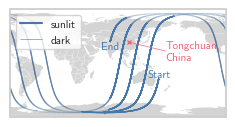

In [11]:
fig, ax = plt.subplots(
    figsize=(4.5, 1.4),
    subplot_kw={"projection": ccrs.PlateCarree(central_longitude=90.0)},
)

ax.add_feature(
    cartopy.feature.BORDERS, linestyle="-", alpha=1, edgecolor=("#FFFFFF"), linewidth=0.2
)

ax.add_feature(cartopy.feature.LAND, facecolor=("#d4d4d4"))
# ax.gridlines()

# make a 10s subsample
traj_df_downsampled = traj_df.iloc[::10, :]

# cmap = sns.color_palette("viridis", as_cmap=True)

# add a line
for i in range(0, len(traj_df_downsampled) - 1):
    # don't plot if the line crosses the dateline
    if abs(traj_df_downsampled.iloc[i]["lon"] - traj_df_downsampled.iloc[i + 1]["lon"]) > 180:
        continue

    ax.plot(
        [traj_df_downsampled.iloc[i]["lon"], traj_df_downsampled.iloc[i + 1]["lon"]],
        [traj_df_downsampled.iloc[i]["lat"], traj_df_downsampled.iloc[i + 1]["lat"]],
        transform=ccrs.PlateCarree(),
        color=pal[0],
        alpha=0.8 if traj_df_downsampled.iloc[i]["is_sunlit"] else 0.05,
        linewidth=1,
    )

# add a marker for the ground station
GST_LAT = 34.93124
GST_LON = 108.89153

ax.plot(
    GST_LON,
    GST_LAT,
    transform=ccrs.PlateCarree(),
    marker="x",
    color=pal[1],
    markersize=3,
    zorder=10,
    alpha=1,
)

# add text for the ground station, start, and stop
ax.text(
    170.0,
    20.0,
    "Tongchuan,\nChina",
    transform=ccrs.PlateCarree(),
    fontsize=8,
    zorder=10,
    color=pal[1],
    ha="left",
    va="center",
)

# add a line from text to marker
ax.plot(
    [GST_LON, 170.0],
    [GST_LAT, 20.0],
    transform=ccrs.PlateCarree(),
    color=pal[1],
    alpha=1,
    linewidth=0.5,
)

ax.text(
    traj_df_downsampled.iloc[0]["lon"],
    traj_df_downsampled.iloc[0]["lat"],
    "Start",
    transform=ccrs.PlateCarree(),
    fontsize=8,
    color=pal[0],
    ha="center",
    va="bottom",
)

ax.text(
    traj_df_downsampled.iloc[-1]["lon"],
    traj_df_downsampled.iloc[-1]["lat"],
    "End",
    transform=ccrs.PlateCarree(),
    fontsize=8,
    color=pal[0],
    ha="center",
    va="top",
)
handles, labels = ax.get_legend_handles_labels()
handles.append(mpl.lines.Line2D([0], [0], color=pal[0]))
labels.append("sunlit")
handles.append(mpl.lines.Line2D([0], [0], color=pal[0], linewidth=0.4))
labels.append("dark")
ax.legend(handles=handles, labels=labels, loc='upper left', fontsize=8)

plt.savefig("trajectory-map.pdf", bbox_inches="tight", pad_inches=0.1)